# Baer 2018 - 1 Displacement TS Analysis
@author: Max Felius

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re, datetime
import os, sys, time

# personal package for sinkhole comparison
sys.path.extend(os.path.join(os.getcwd(),'package'))
import package.geometric_models as gmodel
import package.physical_models as pmodel
# from package.inverse_kinematic_model import inverse_kinematic_model
from package.sinkhole_data_loader import sinkhole_data_loader

#stochastic scripts
from package.stochastic_center_determination import center_determination as stochastic_center_determination
from package.stochastic_inverse_lsq import inverse_kinematic_model as stochastic_inverse_kinematic_model

#Beyer scripts
from package.beyer_center_determination import center_determination as beyer_center_determination
from package.beyer_inverse_lsq import inverse_kinematic_model as beyer_inverse_kinematic_model

#sanns scripts
from package.sanns_center_determination import center_determination as sanns_center_determination
from package.sanns_inverse_lsq import inverse_kinematic_model as sanns_inverse_kinematic_model

#geometric models
from package.geometric_models import gaussian
from package.geometric_models import beyer
from package.geometric_models import sann

#physical model
from package.physical_models import mogi
from package.physical_models import least_squares_mogi

#bals' geometric model
from package.balls_lsq import inverse_kinematic_model
from package.balls_lsq import zg as bals_zg
from package.balls_lsq import center_determination

data_folder = 'Baer2018_1'

start_date = '20111230' #'111214'
start_date_datetime = datetime.datetime.strptime(start_date,'%Y%m%d')
date_list = []
delta_days = []
data_list = []

for date in sorted(os.listdir(data_folder)):
    if date.endswith('.csv'):
        #get the date from the title
        m = re.search(r'111214-\d{6}',date)
        date_conv = datetime.datetime.strptime(m.group(0)[7:],'%y%m%d')
        date_list.append(date_conv)

        #Determine the number of days since the start date
        delta_days.append((date_conv-start_date_datetime).days)

        #Read the data from the files
        import_data = pd.read_csv(os.path.join(data_folder,date),header=None)
        import_data = import_data.sort_values(by=[0])
        
#         import_data[1] = import_data[1]*-1
                                  
        data_list.append(import_data)

#extract and combine x and z coordinates and define t
x = np.array([])
y = np.array([])
t = np.array([])
nitems = 0
for idx,item in enumerate(data_list):
    nitems += 1
    n = len(item)
    t = np.concatenate((t,[delta_days[idx]]*n))
    x = np.concatenate((x,item[0].values))
    y = np.concatenate((y,item[1].values))

#from cm to meter
y = y/100

In [2]:
def get_snr(obs,adj_obs):
    ehat = np.abs(obs - adj_obs)
    SNR = np.abs(adj_obs)/ehat
    return 10*np.log10(SNR)

In [3]:
# Global variables
x_data_list = data_list[0][0].values
x0_array = np.linspace(x_data_list[5],x_data_list[-5],100)
v_in = 100
R_in = 30

# Determine stochastic function center
#center determination based on the RMSE
stochastic_center = stochastic_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,v_in,R_in)
    
#define r
stochastic_x0 = x0_array[np.where(min(stochastic_center)==stochastic_center)[0]]
stochastic_r = np.sqrt((x-stochastic_x0)**2)

#estimate v and R
stochastic_gv, stochastic_gR = stochastic_inverse_kinematic_model(v_in,t,R_in,stochastic_r,y)

# Determine Beyer function center
#center determination based on the RMSE
beyer_center = beyer_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,v_in,R_in)
    
#define r
beyer_x0 = x0_array[np.where(min(beyer_center)==beyer_center)[0]]
beyer_r = np.sqrt((x-beyer_x0)**2)

#estimate v and R
beyer_gv, beyer_gR = beyer_inverse_kinematic_model(v_in,t,R_in,beyer_r,y)

# # Determine sanns function center
# #center determination based on the RMSE
# sanns_center = sanns_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
# #define r
# sanns_x0 = x0_array[np.where(np.nanmin(sanns_center)==sanns_center)[0]]
# sanns_r = np.sqrt((x-sanns_x0)**2)

# #estimate v and R
# sanns_gv, sanns_gR = sanns_inverse_kinematic_model(v_in,t,R_in,sanns_r,y)

Determining Center Position:   0%|          | 0/100 [00:00<?, ?it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Dead_Sea_thesis/package/stochastic_inverse_lsq.py:63: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Dead_Sea_thesis/package/geometric_models.py:23: RuntimeWarning: overflow encountered in double_scalars
  return ((2*np.pi*r**2)/(R**3))*np.exp(-np.pi * (r**2/R**2))
Determining Center Position:  95%|█████████▌| 95/100 [00:05<00:00, 11.86it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-9.922917678372719e-05 and R=195.74099635003842.
Ended using the maximum number of iterations: 100.
The computed values are v=-9.890110174946185e-05 and R=201.1186955061573.


Determining Center Position:  97%|█████████▋| 97/100 [00:05<00:00,  8.33it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-9.858954799783381e-05 and R=206.56545029429424.


Determining Center Position:  99%|█████████▉| 99/100 [00:06<00:00,  6.19it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-9.829316106299903e-05 and R=212.08352636449436.
Ended using the maximum number of iterations: 100.
The computed values are v=-9.801072092575387e-05 and R=217.67527417261104.


Determining Center Position:   0%|          | 0/100 [00:00<?, ?it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-9.774112647502191e-05 and R=223.34313379759354.
Stopped at iteration 9.
The computed values are v=-0.00022883770802219382 and R=31.170570358536708.
The total runtime was: 0.03387904167175293 seconds.


Determining Center Position:  89%|████████▉ | 89/100 [00:06<00:00, 14.24it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Dead_Sea_thesis/package/geometric_models.py:35: RuntimeWarning: overflow encountered in double_scalars
  return (-6*(R**2 -3*r**2)*(R**2 - r**2))/(np.pi*R**7)
Determining Center Position: 100%|██████████| 100/100 [00:06<00:00, 15.16it/s]

Stopped at iteration 31.
The computed values are v=-0.2696341084158059 and R=36.31266095464465.
The total runtime was: 0.047445058822631836 seconds.


In [6]:
# Global variables
v_in = 0.001
R_in = 20
x_data_list = data_list[0][0].values
x0_array = np.linspace(x_data_list[1],x_data_list[-1],100)
theta = np.deg2rad(35)
center = center_determination(t,x,y,x0_array,data_list,delta_days,nitems,v_in,R_in,theta)


bals_x0 = x0_array[np.where(np.nanmin(center)==center)[0]]
r = np.sqrt((x-bals_x0)**2)

#estimate v and R
bals_gv, bals_gR, bals_gTheta = inverse_kinematic_model(v_in,t,R_in,r,y,theta)
print(f'Theta: {np.rad2deg(bals_gTheta)} degree. H: {abs(bals_gR)/np.tan(bals_gTheta)} m. x0: {bals_x0[0]}')

Determining Center Position: 100%|██████████| 100/100 [00:03<00:00, 28.86it/s]


Stopped at iteration 1.
The computed values are v=-0.00023224006901322492 and R=12.693712284616005.
The total runtime was: 0.002026081085205078 seconds.
Theta: 46.61517821703405 degree. H: 11.997478777361934 m. x0: 39.56922267143434


In [7]:
#Define parameters for the mogi model
poisson = 0.3

x = x #already defined
z = np.zeros((len(x))) 

x0 = stochastic_x0
z0 = -10 #[m], from literature

mogi_xhat = least_squares_mogi(t,poisson,x,z,x0,z0,y)

print('Delta V is {:.2f} m3/day'.format(-mogi_xhat[0]))

Delta V is 0.13 m3/day


Gaussian Average Fit Percentage: 16.31%.
Beyer Average Fit Percentage: 6.83%.
Sanns Average Fit Percentage: 0.00%.
Mogi Average Fit Percentage: 23.55%.
Bals Average Fit Percentage: 15.55%.
Gaussian Average RMSE: 4.164088.
Beyer Average RMSE: 4.781009.
Sanns Average RMSE: 0.000000.
Mogi Average RMSE: 38.953455.
Bals Average RMSE: 4.444687.


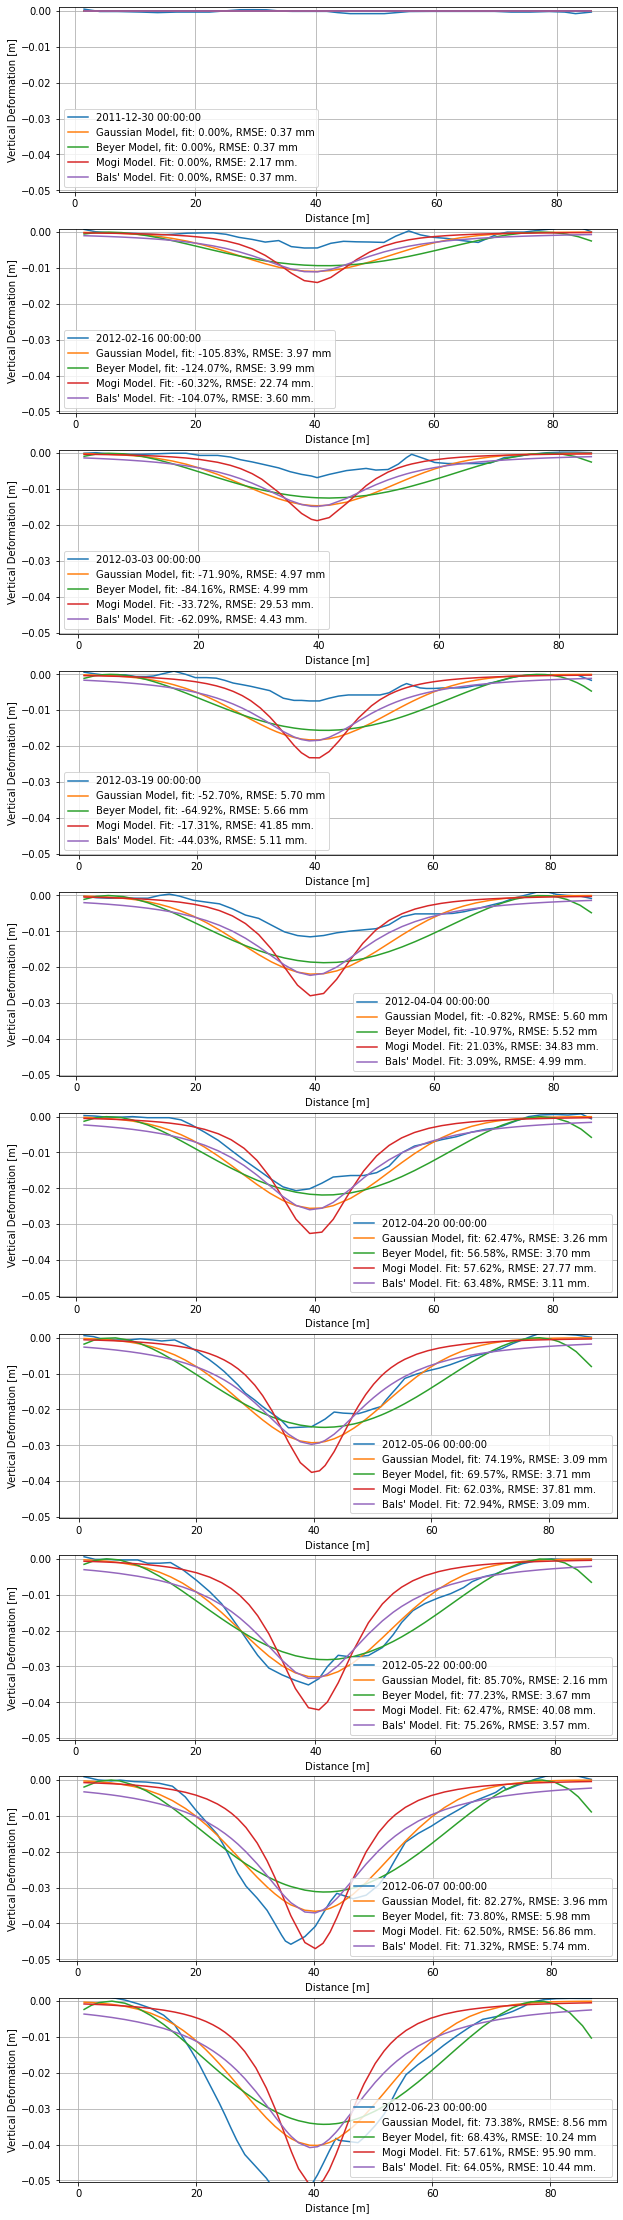

In [9]:
#plot the results

# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(nrows=nitems, figsize = (10,40))
zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

for i in range(nitems):
    #compute some parameters
    y_data = data_list[i][1].values/100 #from cm to meter
    x1 = data_list[i][0].values
    r1 = np.sqrt((x1-x0)**2)
    z1 = np.zeros((len(x1)))
    
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[i]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[i]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
#     #computing the bals model and fit
#     sanns_r1 = np.sqrt((x1-sanns_x0)**2)
#     y3 = sanns_gv*delta_days[i]*sann(sanns_gR,sanns_r1)
#     ehat = y_data - y3
#     bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[2,i] = bals_fit
#     bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[2,i] = bals_RMSE
    
#     mogi model
    mogi_y = mogi_xhat*delta_days[i]*mogi(poisson,x1,z1,x0,z0).T
    ehat = y_data - mogi_y.T
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[i]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE
    
    #plotting the data
    ax[i].plot(x1,y_data,label=date_list[i])

    #plotting the gaussian model
    ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE))  
    
    #plotting the beyer model
    ax[i].plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE))
    
    #plotting the beyer model
#     ax[i].plot(x1,y3,label='Sanns Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(bals_fit,bals_RMSE))
    
    #plot mogi model
    ax[i].plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE))
    
    #bals function
    ax[i].plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE))
    
    #Notations
    ax[i].grid(True)
    ax[i].set_xlabel('Distance [m]')
    ax[i].set_ylabel('Vertical Deformation [m]')
    ax[i].set_ylim(zmin*1.1,0.001)
#     ax[i].set_title('Model fit: {:.4f}'.format(fit))
    ax[i].legend()

#skip the first fit percentage
avg_gfit = np.sum(fit_list[0,1:])/(nitems-1)
avg_befit = np.sum(fit_list[1,1:])/(nitems-1)
avg_bafit = np.sum(fit_list[2,1:])/(nitems-1)
avg_mofit = np.sum(fit_list[3,1:])/(nitems-1)
avg_balsfit = np.sum(fit_list[4,1:])/(nitems-1)

avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems)
avg_beRMSE = np.sum(RMSE_list[1,:])/(nitems)
avg_baRMSE = np.sum(RMSE_list[2,:])/(nitems)
avg_moRMSE = np.sum(RMSE_list[3,:])/(nitems)
avg_balsRMSE = np.sum(RMSE_list[4,:])/(nitems)

print('Gaussian Average Fit Percentage: {:.2f}%.'.format(avg_gfit))
print('Beyer Average Fit Percentage: {:.2f}%.'.format(avg_befit))                                                
print('Sanns Average Fit Percentage: {:.2f}%.'.format(avg_bafit))                                                
print('Mogi Average Fit Percentage: {:.2f}%.'.format(avg_mofit))    
print('Bals Average Fit Percentage: {:.2f}%.'.format(avg_balsfit)) 

print('Gaussian Average RMSE: {:.6f}.'.format(avg_gRMSE))
print('Beyer Average RMSE: {:.6f}.'.format(avg_beRMSE))                                                
print('Sanns Average RMSE: {:.6f}.'.format(avg_baRMSE))
print('Mogi Average RMSE: {:.6f}.'.format(avg_moRMSE))
print('Bals Average RMSE: {:.6f}.'.format(avg_balsRMSE))

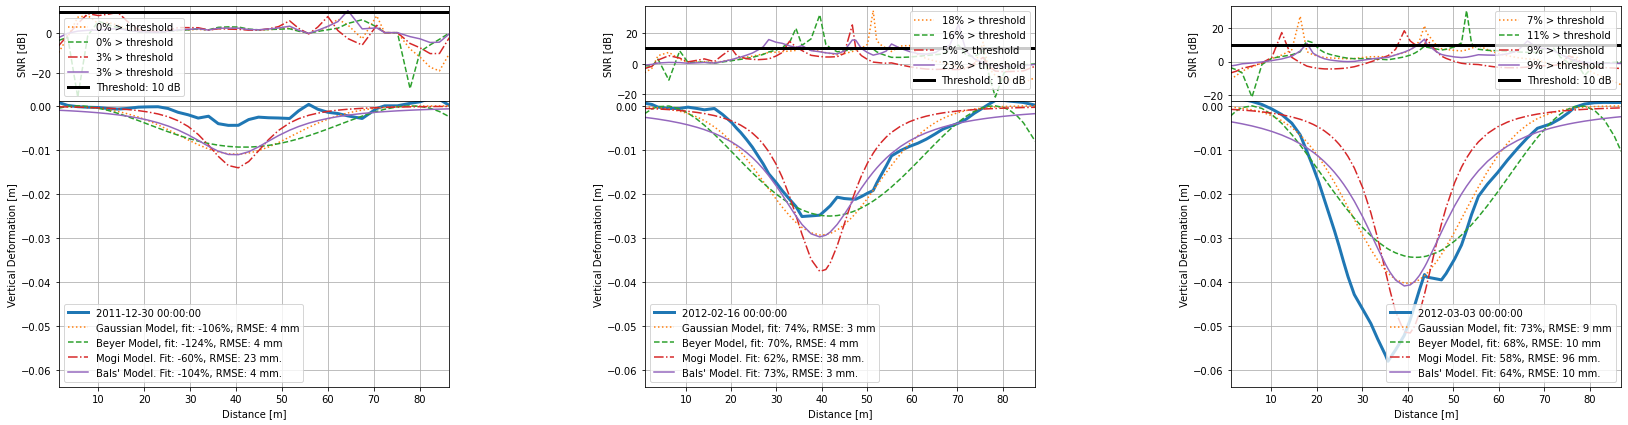

In [14]:
#creating the figure outline
fig = plt.figure(figsize=(28,7))
spec = plt.GridSpec(4,3,hspace=0,wspace=0.5)

ax_tl = fig.add_subplot(spec[0, 0],xticklabels=[])
ax_bl = fig.add_subplot(spec[1:, 0])
ax_tm = fig.add_subplot(spec[0, 1],xticklabels=[])
ax_bm = fig.add_subplot(spec[1:, 1])
ax_tr = fig.add_subplot(spec[0, 2],xticklabels=[])
ax_br = fig.add_subplot(spec[1:, 2])

axes_list = [(ax_tl,ax_bl),(ax_tm,ax_bm),(ax_tr,ax_br)]

#figure standard variables
threshold = 10
nitems_list = [1,6,-1]
nitems = len(nitems_list)
# plt.rcParams.update({'font.size': 8})
zmin = min(data_list[-1][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

for i in range(nitems):
    y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
    x1 = data_list[nitems_list[i]][0].values
    r1 = np.sqrt((x1-x0)**2)
    z1 = np.zeros((len(x1)))
     
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
#     #computing the bals model and fit
#     sanns_r1 = np.sqrt((x1-sanns_x0)**2)
#     y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
#     ehat = y_data - y3
#     bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
#     fit_list[2,i] = bals_fit
#     bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
#     RMSE_list[2,i] = bals_RMSE
    
    #mogi model
    mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0,z0).T
    ehat = y_data - mogi_y.T
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE
    
    #plotting the models in the figures
    #plotting the data
    axes_list[i][1].plot(x1,y_data,label=date_list[i],linewidth=3.0)
    
    #plotting the gaussian model
    gauss_fig = axes_list[i][1].plot(x1,y1,label='Gaussian Model, fit: {:.0f}%, RMSE: {:.0f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  
    
    #plotting the beyer model
    beyer_fig = axes_list[i][1].plot(x1,y2,label='Beyer Model, fit: {:.0f}%, RMSE: {:.0f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')
    
    #plot mogi model
    mogi_fig = axes_list[i][1].plot(x1,mogi_y,label='Mogi Model. Fit: {:.0f}%, RMSE: {:.0f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')
    
    #bals function
    bals_fig = axes_list[i][1].plot(x1,y4,label='Bals\' Model. Fit: {:.0f}%, RMSE: {:.0f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')
    
    #Notations
    axes_list[i][1].grid(True)
    axes_list[i][1].set_xlim([min(x1),max(x1)])
    axes_list[i][1].set_xlabel('Distance [m]')
    axes_list[i][1].set_ylabel('Vertical Deformation [m]')
    axes_list[i][1].set_ylim(zmin*1.1,0.001)
    axes_list[i][1].legend()
    
    #add SNR figure
    snr_gauss = get_snr(y_data,y1)
    snr_beyer = get_snr(y_data,y2)
    snr_mogi = get_snr(y_data,mogi_y.T[0])
    snr_bals = get_snr(y_data,y4)

    #check percentage above the threshold
    above_threshold_gauss = snr_gauss>threshold
    above_threshold_beyer = snr_beyer>threshold
    above_threshold_mogi = snr_mogi>threshold
    above_threshold_bals = snr_bals>threshold

    #notations snr figure
    gauss_perc = np.sum(above_threshold_gauss)/len(snr_gauss)
    beyer_perc = np.sum(above_threshold_beyer)/len(snr_beyer)
    mogi_perc = np.sum(above_threshold_mogi)/len(snr_mogi)
    bals_perc = np.sum(above_threshold_bals)/len(snr_bals)
    
    axes_list[i][0].plot(x1,snr_gauss,c=gauss_fig[0].get_color(),linestyle='dotted',label='{:.0f}% > threshold'.format(gauss_perc*100))
    axes_list[i][0].plot(x1,snr_beyer,c=beyer_fig[0].get_color(),linestyle='dashed',label='{:.0f}% > threshold'.format(beyer_perc*100))
    axes_list[i][0].plot(x1,snr_mogi,c=mogi_fig[0].get_color(),linestyle='dashdot',label='{:.0f}% > threshold'.format(mogi_perc*100))
    axes_list[i][0].plot(x1,snr_bals,c=bals_fig[0].get_color(),label='{:.0f}% > threshold'.format(bals_perc*100))
    axes_list[i][0].plot(x1,[threshold for _ in range(len(x1))],c='k',linewidth=3,label='Threshold: {:.0f} dB'.format(threshold))

    axes_list[i][0].legend()
    axes_list[i][0].grid(True)
    axes_list[i][0].set_xlim([min(x1),max(x1)])
    axes_list[i][0].set_ylabel('SNR [dB]')